# Comparing PS1 Stack and PS1 Mean catalog

I noticed some strange features in PS1 Mean photometry especially in PSFMag fainter than $\sim$ 22.5 mag. I thus investigate these points.

In [26]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
hst_ps1_mean = pd.read_csv('HST_PS1_mean_tachibana.csv')
hst_ps1_stack = pd.read_csv('HST_PS1_stack_tachibana.csv')

In [27]:
cat_mean = hst_ps1_mean.drop_duplicates(['objID'])
cat_stack = hst_ps1_stack.drop_duplicates(['objID'])
print "'Mean' data length %d -> %d" %(len(hst_ps1_mean), len(cat_mean))
print "'Stack' data length %d -> %d" %(len(hst_ps1_stack), len(cat_stack))
del hst_ps1_mean, hst_ps1_stack

'Mean' data length 45788 -> 44933
'Stack' data length 47983 -> 39839


Mean catalog could get more unduplicated sources than Stack catalog. 

In [10]:
print "'Mean' data length with 'cat_mean.raStack!=-999' is %d " %len(cat_mean[cat_mean.raStack!=-999])

'Mean' data length with 'cat_mean.raStack!=-999' is 39839 


It is same number as taht in Stack catalog

In [41]:
def plt_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab1, ylab1, xlab2, ylab2, 
                           ptype='hexbin', zval=None, vmin=None, vmax=None, zlab=None, bins=None, grid=100, 
                           xscale1='linear', yscale1='linear', xscale2='linear', yscale2='linear', title1='STAR', title2='GALAXY'):
    font = 'sans-serif'
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    if ptype=='hexbin':
        plt.hexbin(xval1, yval1, zval, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
        plt.colorbar().set_label(zlab, fontname=font, fontsize=15)
    elif ptype=='scatter':
        plt.scatter(xval1, yval1, alpha=0.01)
    plt.xscale(xscale1); plt.yscale(yscale1)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.title(title1, fontname=font, fontsize=25)
    plt.xlabel(xlab1, fontname=font, fontsize=15)
    plt.ylabel(ylab1, fontname=font, fontsize=15)
    plt.subplot(1,2,2)
    if ptype=='hexbin':
        plt.hexbin(xval2, yval2, zval, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
        plt.colorbar().set_label(zlab, fontname=font, fontsize=15)
    elif ptype=='scatter':
        plt.scatter(xval2, yval2, alpha=0.01)
    plt.xscale(xscale2); plt.yscale(yscale2)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.title(title2, fontname=font, fontsize=25)
    plt.xlabel(xlab2, fontname=font, fontsize=15)
    plt.ylabel(ylab2, fontname=font, fontsize=15)

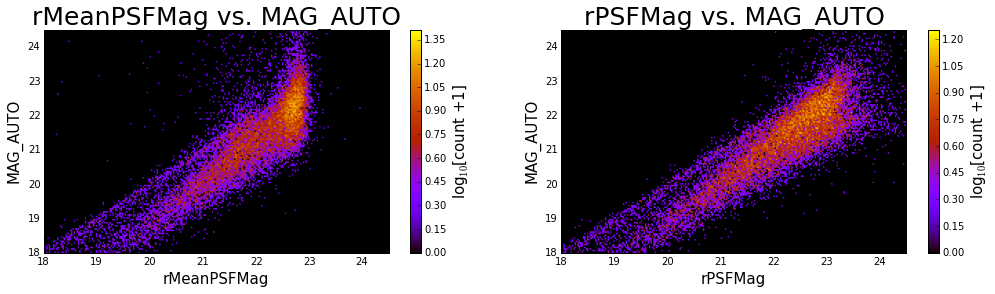

In [43]:
xval1 = cat_mean.rMeanPSFMag; yval1 = cat_mean.MAG_AUTO
xval2 = cat_stack.rPSFMag; yval2 = cat_stack.MAG_AUTO
extent = [18, 24.5, 18, 24.5]
xlab1 = 'rMeanPSFMag'; ylab1 = 'MAG_AUTO'
xlab2 = 'rPSFMag'; ylab2 = 'MAG_AUTO'
bins = 'log'; grid = 250
title1 = 'rMeanPSFMag vs. MAG_AUTO'; title2 = 'rPSFMag vs. MAG_AUTO'
zlab = 'log$_{10}$[count +1]'
plt_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab1, ylab1, xlab2, ylab2, zlab=zlab, bins=bins, grid=grid, title1=title1, title2=title2)

rMeanPSFMag seems to get stuck at $\sim$ 23 mag. 

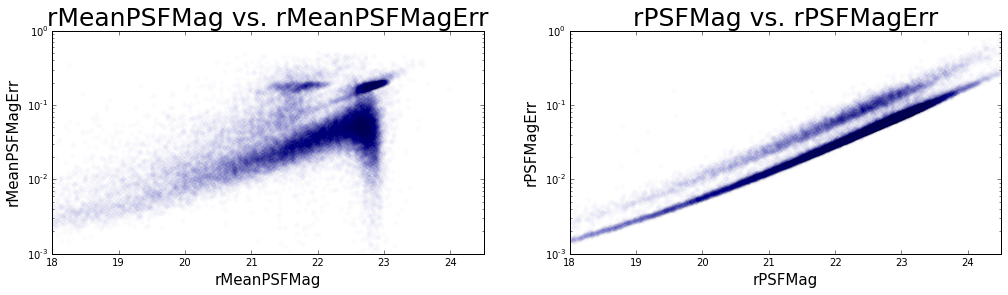

In [37]:
xval1 = cat_mean.rMeanPSFMag; yval1 = cat_mean.rMeanPSFMagErr
xval2 = cat_stack.rPSFMag; yval2 = cat_stack.rPSFMagErr
extent = [18, 24.5, 1e-3, 1]
xlab1 = 'rMeanPSFMag'; ylab1 = 'rMeanPSFMagErr'
xlab2 = 'rPSFMag'; ylab2 = 'rPSFMagErr'
bins = 'log'; grid = 250; yscale1 = 'log'; yscale2 = 'log'
title1 = 'rMeanPSFMag vs. rMeanPSFMagErr'; title2 = 'rPSFMag vs. rPSFMagErr'
ptype = 'scatter'
plt_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab1, ylab1, xlab2, ylab2, 
                       ptype=ptype, bins=bins, grid=grid, yscale1=yscale1, yscale2=yscale2, title1=title1, title2=title2)

Error estimation of Mean photometry in fainter than 22.5 mag  is somewhat starange (depending on number of detection, the dense portion around err $\sim0.1$ mag $\sim 21.5$ probably corresponding to sources with smaller number of detection than those in the most dense portion around err $\sim0.1$ mag $\sim 23$). 

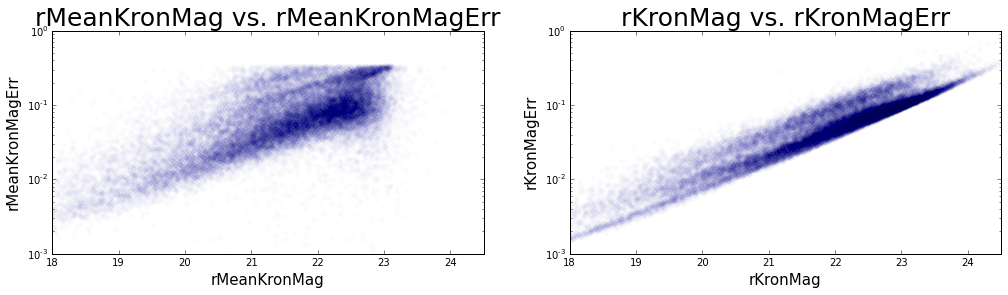

In [44]:
xval1 = cat_mean.rMeanKronMag; yval1 = cat_mean.rMeanKronMagErr
xval2 = cat_stack.rKronMag; yval2 = cat_stack.rKronMagErr
extent = [18, 24.5, 1e-3, 1]
xlab1 = 'rMeanKronMag'; ylab1 = 'rMeanKronMagErr'
xlab2 = 'rKronMag'; ylab2 = 'rKronMagErr'
bins = 'log'; grid = 250; yscale1 = 'log'; yscale2 = 'log'
title1 = 'rMeanKronMag vs. rMeanKronMagErr'; title2 = 'rKronMag vs. rKronMagErr'
ptype = 'scatter'
plt_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab1, ylab1, xlab2, ylab2, 
                       ptype=ptype, bins=bins, grid=grid, yscale1=yscale1, yscale2=yscale2, title1=title1, title2=title2)

Error in MeanKronMag is more natural (but it seems to be limited at $\sim0.35$).  

In [54]:
cat = pd.merge(cat_mean, cat_stack, on='objID', how='outer')

In [56]:
cat[0:5]

,MAG_AUTO_x,MAGERR_AUTO_x,MAG_BEST_x,MAGERR_BEST_x,KRON_RADIUS_x,FWHM_IMAGE_x,MU_MAX_x,CLASS_STAR_x,MU_CLASS_x,objID,...,gKronMagErr,rKronMag,rKronMagErr,iKronMag,iKronMagErr,zKronMag,zKronMagErr,yKronMag,yKronMagErr,Column1_y
0,22.517223,0.011435,22.517223,0.011439,4.242650,13.148605,20.497217,0.028073,1,109881495927824692,...,0.109838,22.545200,0.078544,22.576799,0.188931,-999.000000,-999.000000,-999.000000,-999.000000,0.146668
1,21.082811,0.006105,21.082811,0.006107,3.861765,32.668663,19.958809,0.027856,1,109881495969889066,...,-999.000000,22.003799,0.087880,21.196899,0.067879,20.976000,0.085674,21.058399,0.187496,0.227454
2,25.355888,0.076332,25.355888,0.076353,4.026368,10.327246,22.190931,0.169464,1,109881501953716902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.222277,0.019011,22.222277,0.019016,5.608570,36.288643,21.648720,0.000388,1,109891495349868802,...,0.174294,22.953899,0.198894,21.594801,0.119912,22.361601,0.220694,-999.000000,-999.000000,0.507311
4,20.977619,0.004298,20.977619,0.004300,4.162336,7.771351,18.466242,0.028688,1,109891495557280130,...,0.071581,22.005501,0.047019,21.086300,0.047824,20.643499,0.055568,20.186899,0.099833,0.052204


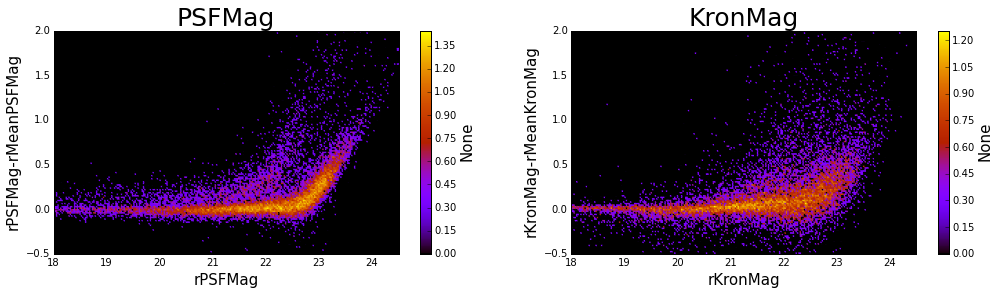

In [63]:
det_stack = (cat.raStack_x!=-999)&(cat.decStack_x!=-999)
xval1 = cat.rPSFMag[det_stack]; yval1 = cat.rPSFMag[det_stack] - cat.rMeanPSFMag[det_stack]
xval2 = cat.rKronMag[det_stack]; yval2 = cat.rKronMag[det_stack] - cat.rMeanKronMag[det_stack]
extent = [18, 24.5, -0.5, 2]
xlab1 = 'rPSFMag'; ylab1 = 'rPSFMag-rMeanPSFMag'
xlab2 = 'rKronMag'; ylab2 = 'rKronMag-rMeanKronMag'
bins = 'log'; grid = 250; 
title1 = 'PSFMag'; title2 = 'KronMag'
ptype = 'hexbin'
plt_star_galaxy(xval1, yval1, xval2, yval2, extent, xlab1, ylab1, xlab2, ylab2, 
                       ptype=ptype, bins=bins, grid=grid, title1=title1, title2=title2)

Since the mean photometry gets stuck at $\sim23$ mag magnitude difference between Mean photometry and Stack photometry (Stack - Mean) increases from $\sim23$ mag. 

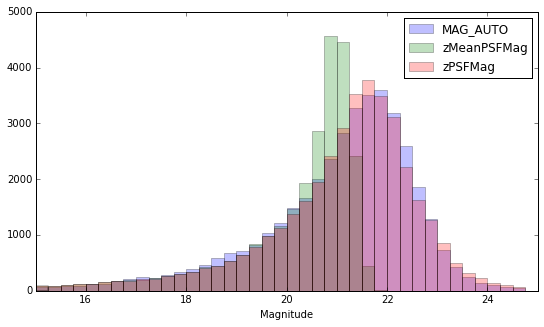

In [89]:
plt.figure(figsize=(9,5))
plt.hist(cat.MAG_AUTO_x[det_stack], bins=np.arange(15,25,0.25), alpha=0.25, label='MAG_AUTO')
plt.hist(cat.zMeanPSFMag[det_stack], bins=np.arange(15,25,0.25), alpha=0.25, label='zMeanPSFMag')
plt.hist(cat.zPSFMag[det_stack], bins=np.arange(15,25,0.25), alpha=0.25, label='zPSFMag')
plt.legend(loc='best')
plt.xlabel('Magnitude')
plt.xlim(15,25)
plt.show()

#### Brightness distribution of PSFMag by Stack photometry is quite consistent with that of MAG_AUTO. PSFMag in Mean photometry probably doesn't provide the correct brightness of a faint source.